# Lecture de Dataset et Import du model

In [1]:
import innvestigate
import numpy as np
from keras.models import load_model
!python -c 'import keras; print(keras.__version__)'
model = load_model('model.h5')
import pickle
train_x = pickle.load(open('train_x.pickle', "rb"))
test_x = pickle.load(open('test_x.pickle', "rb"))
test_y = pickle.load(open('test_y.pickle', "rb"))
print(test_x.shape)
print(test_y.shape)
tests = np.append(test_x, test_y, axis=1)
print(tests)
print(tests.shape)
tests_sorted_by_class = tests[np.lexsort((tests[:,-6], tests[:,-5], tests[:,-4], tests[:,-3], tests[:,-2], tests[:,-1]))]

Using TensorFlow backend.


Using TensorFlow backend.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/__init__.py", line 3, in <module>
    from . import utils
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/utils/__init__.py", line 6, in <module>
    from . import conv_utils
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/utils/conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/backend/__init__.py", line 89, in <module>
    from .tensorflow_backend import *
  File "/home/raysamram/.local/lib/python3.8/site-packages/keras/backend/tensorflow_backend.py", line 5, in <module>
    import tensorflow as tf
ModuleNotFoundError: No module named 'tensorflow'




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.wh

In [2]:
print(tests_sorted_by_class)
classes_index = {}
for i in range(1, 7):
    print(i)
    print(np.argwhere(tests_sorted_by_class[-i]==1))
    classes_index[str(6-i)]=np.argwhere(tests_sorted_by_class[-i]==1)
print(classes_index)

[[ 604.088   1236.48     939.488   ...   85.7822     3.06317    0.     ]
 [ 171.269    188.165    213.441   ...   75.2942     4.01708    0.     ]
 [  19.2739    59.2514   113.071   ...   29.8718     4.41336    0.     ]
 ...
 [  62.4855   243.01     252.264   ...  190.985     88.6224     5.     ]
 [ 198.099    187.072    374.326   ...  149.17     142.125      5.     ]
 [ 164.131    273.348    172.972   ...  603.575    260.067      5.     ]]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
{'5': array([], shape=(0, 1), dtype=int64), '4': array([], shape=(0, 1), dtype=int64), '3': array([], shape=(0, 1), dtype=int64), '2': array([], shape=(0, 1), dtype=int64), '1': array([], shape=(0, 1), dtype=int64), '0': array([], shape=(0, 1), dtype=int64)}


# Préparation de l'ensemble des classes de LRP

In [3]:
equivalents = {
"leukemia class: ALL with t(12;21)":0,  # ALL
"leukemia class: c-ALL/Pre-B-ALL with t(9;22)":0, # ALL
"leukemia class: AML with normal karyotype + other abnormalities":1, # AML
"leukemia class: ALL with t(1;19)":0, # ALL
"leukemia class: CLL":2, # CLL
"leukemia class: AML with t(15;17)":1, # AML
"leukemia class: Non-leukemia and healthy bone marrow":5, # Non-Leukemia
"leukemia class: Pro-B-ALL with t(11q23)/MLL":0, # ALL
"leukemia class: ALL with hyperdiploid karyotype":0, # ALL
"leukemia class: T-ALL":0, # ALL
"leukemia class: AML with t(8;21)":1, # AML
"leukemia class: AML with inv(16)/t(16;16)":1, # AML
"leukemia class: MDS":4, # MDS
"leukemia class: mature B-ALL with t(8;14)":0, # ALL
"leukemia class: c-ALL/Pre-B-ALL without t(9;22)":0, # ALL
"leukemia class: AML with t(11q23)/MLL":1, # AML
"leukemia class: CML":3, # CML
"leukemia class: AML complex aberrant karyotype":1, # AML
}


methods = [
    ("lrp.z"),
    ('lrp.z_IB'),
    ('lrp.epsilon'),
     ('lrp.epsilon_IB'),
    ('lrp.w_square'),
    ('lrp.flat'),
    ('lrp.alpha_2_beta_1'),
    ('lrp.alpha_2_beta_1_IB'),
    ('lrp.alpha_1_beta_0'), 
    ('lrp.alpha_1_beta_0_IB'),
    ('lrp.z_plus'),
    ('lrp.z_plus_fast'),
    ('lrp.sequential_preset_a'),
    ('lrp.sequential_preset_b'),
    ('lrp.sequential_preset_a_flat'),
    ('lrp.sequential_preset_b_flat'),
    ]


analyzers = {}
print(methods)
for method in methods:
    print("Analyzer for Method : "+str(method))    
    analyzer = innvestigate.create_analyzer(method, model)
    analyzer.fit(train_x, batch_size=256, verbose=1)
    analyzers[method]= analyzer

['lrp.z', 'lrp.z_IB', 'lrp.epsilon', 'lrp.epsilon_IB', 'lrp.w_square', 'lrp.flat', 'lrp.alpha_2_beta_1', 'lrp.alpha_2_beta_1_IB', 'lrp.alpha_1_beta_0', 'lrp.alpha_1_beta_0_IB', 'lrp.z_plus', 'lrp.z_plus_fast', 'lrp.sequential_preset_a', 'lrp.sequential_preset_b', 'lrp.sequential_preset_a_flat', 'lrp.sequential_preset_b_flat']
Analyzer for Method : lrp.z
Analyzer for Method : lrp.z_IB
Analyzer for Method : lrp.epsilon
Analyzer for Method : lrp.epsilon_IB
Analyzer for Method : lrp.w_square
Analyzer for Method : lrp.flat
Analyzer for Method : lrp.alpha_2_beta_1
Analyzer for Method : lrp.alpha_2_beta_1_IB
Analyzer for Method : lrp.alpha_1_beta_0
Analyzer for Method : lrp.alpha_1_beta_0_IB
Analyzer for Method : lrp.z_plus
Analyzer for Method : lrp.z_plus_fast
Analyzer for Method : lrp.sequential_preset_a
Analyzer for Method : lrp.sequential_preset_b
Analyzer for Method : lrp.sequential_preset_a_flat
Analyzer for Method : lrp.sequential_preset_b_flat


/home/raysamram/py_37_env/lib/python3.7/site-packages/innvestigate/analyzer/base.py:130: RuntimeWarning: This analyzer does not need to be trained. Still fit() is called.
  " Still fit() is called.", RuntimeWarning)


In [4]:
results = {}

for i in analyzers:
  print("Analyzing with "+str(i))
  results[i] = []
  for j in range(len(test_x)):
    x = np.array([test_x[j]])
    results[i].append(analyzers[i].analyze(x))

Analyzing with lrp.z
Analyzing with lrp.z_IB
Analyzing with lrp.epsilon
Analyzing with lrp.epsilon_IB
Analyzing with lrp.w_square
Analyzing with lrp.flat
Analyzing with lrp.alpha_2_beta_1
Analyzing with lrp.alpha_2_beta_1_IB
Analyzing with lrp.alpha_1_beta_0
Analyzing with lrp.alpha_1_beta_0_IB
Analyzing with lrp.z_plus
Analyzing with lrp.z_plus_fast
Analyzing with lrp.sequential_preset_a
Analyzing with lrp.sequential_preset_b
Analyzing with lrp.sequential_preset_a_flat
Analyzing with lrp.sequential_preset_b_flat


In [5]:
print(results.keys())
for i in results:
  print(str(i)+" : "+str(len(results[i])))
means = {}
import numpy as np
for i in results:
  mat = np.array(results[i])
  mean = mat.mean(0)
  means[i] = mean

dict_keys(['lrp.z', 'lrp.z_IB', 'lrp.epsilon', 'lrp.epsilon_IB', 'lrp.w_square', 'lrp.flat', 'lrp.alpha_2_beta_1', 'lrp.alpha_2_beta_1_IB', 'lrp.alpha_1_beta_0', 'lrp.alpha_1_beta_0_IB', 'lrp.z_plus', 'lrp.z_plus_fast', 'lrp.sequential_preset_a', 'lrp.sequential_preset_b', 'lrp.sequential_preset_a_flat', 'lrp.sequential_preset_b_flat'])
lrp.z : 692
lrp.z_IB : 692
lrp.epsilon : 692
lrp.epsilon_IB : 692
lrp.w_square : 692
lrp.flat : 692
lrp.alpha_2_beta_1 : 692
lrp.alpha_2_beta_1_IB : 692
lrp.alpha_1_beta_0 : 692
lrp.alpha_1_beta_0_IB : 692
lrp.z_plus : 692
lrp.z_plus_fast : 692
lrp.sequential_preset_a : 692
lrp.sequential_preset_b : 692
lrp.sequential_preset_a_flat : 692
lrp.sequential_preset_b_flat : 692


# Calcul de la moyenne pour chaque méthode d'interprétation

In [6]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


plots = []
sorted_plots = []
inverse_sort = []
for i in means:
  plots.append(means[i][0])
  sorted_plots.append(np.sort(means[i][0])[::-1])
  inverse_sort.append(np.sort(means[i][0]))
  


# HeatMap des pertinences de chaque sous-méthode de  LRP

[[-1.9358075e-04  9.9445842e-03 -5.2063735e-03 ...  1.7631247e-03
   3.3850945e-03  5.5831764e-04]
 [-1.8875391e-04  9.3841245e-03 -4.9381042e-03 ...  1.6703538e-03
   3.1978718e-03  5.2890868e-04]
 [-1.9358107e-04  9.9445833e-03 -5.2063735e-03 ...  1.7631245e-03
   3.3850942e-03  5.5831764e-04]
 ...
 [-1.8156305e-04  8.5704410e-03 -4.5479801e-03 ...  1.5354713e-03
   2.9259869e-03  4.8614107e-04]
 [ 1.4400753e-05  1.4400753e-05  1.4400753e-05 ...  1.4400753e-05
   1.4400753e-05  1.4400753e-05]
 [ 1.4400753e-05  1.4400753e-05  1.4400753e-05 ...  1.4400753e-05
   1.4400753e-05  1.4400753e-05]]
Min : -3.719094
Max : 1.866224
(16, 54630)


AttributeError: 'AxesSubplot' object has no attribute 'yticks'

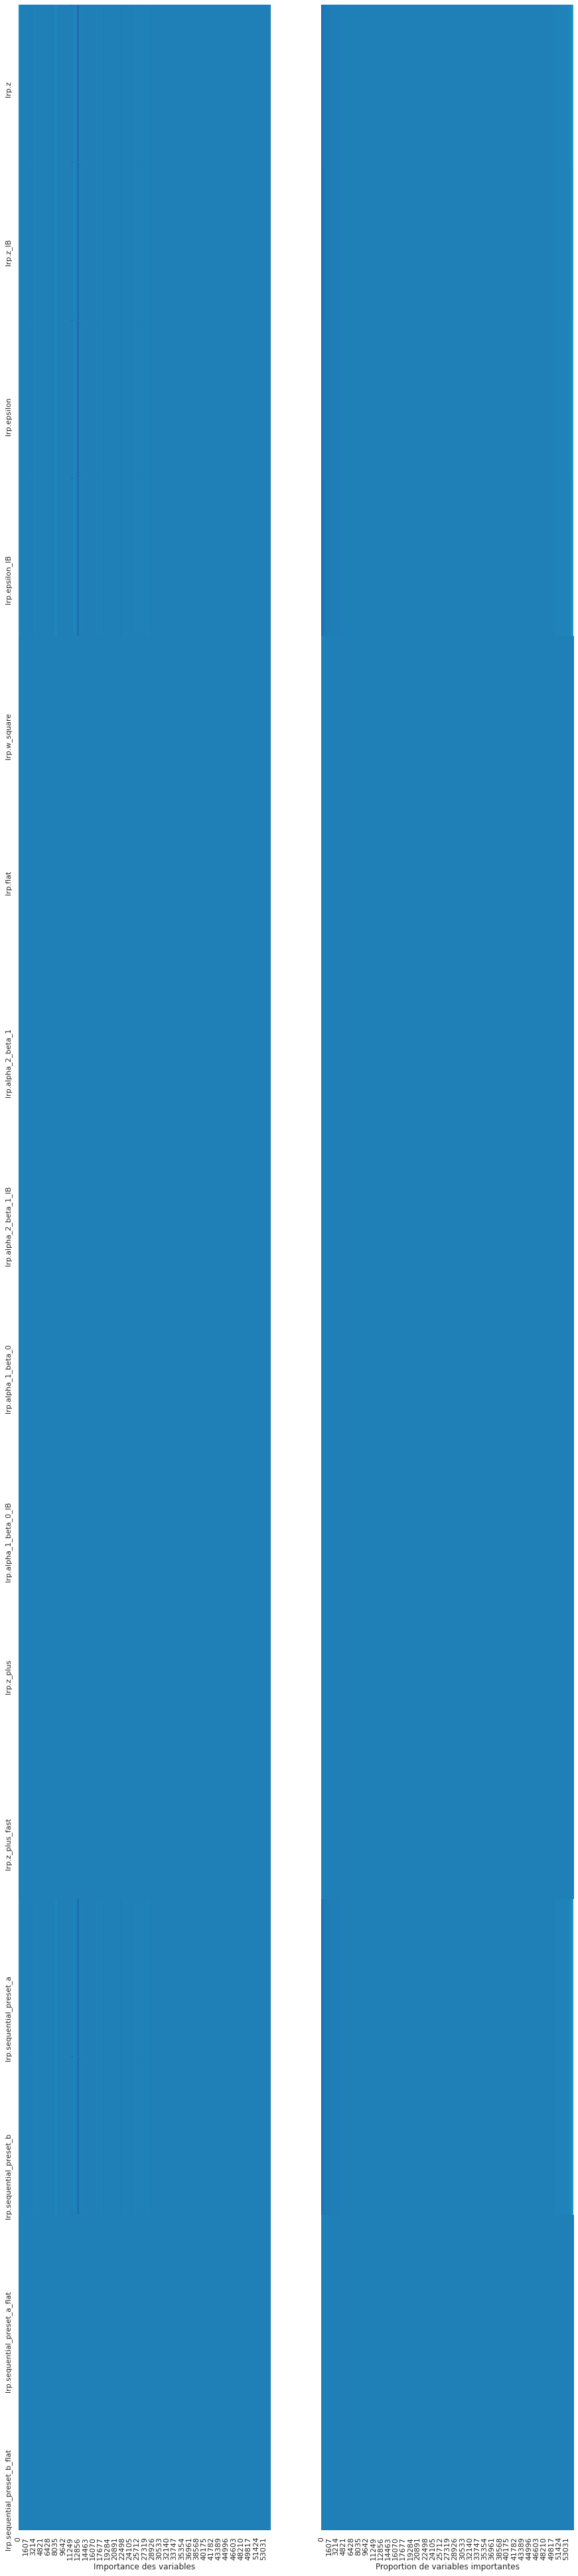

In [7]:
toplot = np.array(plots)
print(str(toplot))
print("Min : "+str(np.min(toplot)))
print("Max : "+str(np.max(toplot)))
print(toplot.shape)
f,(ax1,ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(70)
f.set_figwidth(15)

g1 = sns.heatmap(toplot,cmap="YlGnBu",cbar=False,ax=ax1)
g1.set(yticklabels = methods)
g1.set_ylabel('')
g1.set_xlabel('Importance des variables')

g2 = sns.heatmap(np.array(sorted_plots),cmap="YlGnBu",cbar=False,ax=ax2)
g2.set(yticklabels = methods)
g2.set_xlabel('Proportion de variables importantes')

g1.yticks(fontsize=20, rotation=0)
g2.yticks(fontsize=20, rotation=0)
plt.show()

# Application de la perturbation

In [ ]:
from sklearn.metrics import precision_score

def perturbation(passes, strategy, analysis, sorted_analysis, model, test_set, test_result, Verbose=True, seuil=None):
  precisions = []
  features_mask = []
  for i in range(passes):
    if seuil is not None and sorted_analysis[i]<seuil:
      print('Limit reached with '+str(i)+'  features.')
      break
    features_mask.append(np.argwhere(analysis==sorted_analysis[i])[0][1])
  if Verbose:
    print("Important features : \n"+str(features_mask))
  y_result = model.predict(test_set)
  y_result = np.argmax(y_result, axis=1)
  test_result = np.argmax(test_result, axis=1)
  initial_precision = precision_score(y_result, test_result, average='macro')
  if Verbose:
    print("Initial precision : "+str(initial_precision))
  precisions.append(initial_precision)
  modified_test_set = []
  nbr_lines = test_set[:, features_mask[0]].shape
  modified_test_set =  test_set.copy()
  if Verbose:
    print("Size of a test element : "+str(test_set[0].shape))
  for k in range(passes):
    set_set = []
    if Verbose:
      print('Treating feature '+str(features_mask[k])+" with "+str(strategy)+" strategy")
      print("Number of already treated features : "+str(len(np.where( modified_test_set[0] == 0))))
    if strategy == "zeros":
      modified_test_set[:, features_mask[k]] = np.zeros((nbr_lines))
    elif strategy == "mean":
      modified_test_set[:, features_mask[k]] = np.mean(modified_test_set[:, features_mask[k]])
    else:
      modified_test_set[:, features_mask[k]] = np.random.choice(modified_test_set[:, features_mask[k]])

    y_new_result = model.predict(modified_test_set)
    y_new_result = np.argmax(y_new_result, axis=1)
    new_precision = precision_score(y_new_result, test_result, average='macro')
    if Verbose:
      print("New precision : "+str(new_precision))
    precisions.append(new_precision)
  return precisions

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,100)
from cycler import cycler
count = 0

fig, axes = plt.subplots(len(methods), figsize=(20, 150), squeeze=False)
fig.tight_layout() 


num_perturbations = 1000

import random
count = 0
strategy = "zeros"
for method in means:
    print("Perturbation on "+str(method)+" Analyzer | Perturbation strategy by zeros")
    perturbation_results = perturbation(num_perturbations, strategy, means[method], sorted_plots[count], model, test_x, test_y, Verbose=False)
    axes[count, 0].plot(perturbation_results, color='green')
    axes[count, 0].set_ylim([0,1])
    axes[count, 0].title.set_text(method+" with perturbation on most relevant features and strategy "+str(strategy))
    count += 1
plt.show()
